## NLP Class 1 Part 2

### Tokenization, Stemming & Lemmatization, Part-of-speech Tagging

In [1]:
#import nltk
#nltk.download('popular', halt_on_error=False)
#nltk.download('all', halt_on_error=False)

In [2]:
#! pip install --user textblob

In [3]:
import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import pandas as pd
import re
import sys

In [4]:
print(sys.version)

3.5.4 |Anaconda 4.0.0 (64-bit)| (default, Aug 14 2017, 13:41:13) [MSC v.1900 64 bit (AMD64)]


In [5]:
text = "Flu season hitting earlier, with dozens more outbreaks — and more severe symptoms"
tokens = nltk.tokenize.word_tokenize(text)
print(tokens)

['Flu', 'season', 'hitting', 'earlier', ',', 'with', 'dozens', 'more', 'outbreaks', '—', 'and', 'more', 'severe', 'symptoms']


In [6]:
directory = 'C://Users//Nick//Documents//Teaching//Data Projects//Text//Books//'

In [7]:
book = '3boat10.txt'

#### Get most frequent words in a book

In [8]:
f = open(directory+book)
bk_3boat = f.read()

words = nltk.tokenize.word_tokenize(bk_3boat)
fdist = nltk.FreqDist(words)

print(fdist)

#fdist.items() - will give all words
fdist.most_common(10)

<FreqDist with 7778 samples and 79620 outcomes>


[(',', 5702),
 ('the', 3338),
 ('and', 3215),
 ('.', 3081),
 ('to', 1748),
 ('a', 1621),
 ('of', 1425),
 ('I', 1208),
 ('it', 1159),
 ('in', 931)]

#### Get most frequent clean words in a book

In [9]:
#from nltk.corpus import stopwords

#default_stopwords = set(nltk.corpus.stopwords.words('english'))

words = nltk.tokenize.word_tokenize(bk_3boat)

#stopwords = stopwords.words('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Remove single-character tokens (mostly punctuation)
words = [word for word in words if len(word) > 1]

# Remove numbers
#words = [word for word in words if not word.isnumeric()]

# Remove punctuation
words = [word for word in words if word.isalpha()]

# Lowercase all words (default_stopwords are lowercase too)
words = [word.lower() for word in words]

# Remove stopwords
words = [word for word in words if word not in stopwords]

fdist = nltk.FreqDist(words)

print(fdist)

#fdist.items() - will give all words
fdist.most_common(10)

<FreqDist with 6232 samples and 29826 outcomes>


[('said', 378),
 ('would', 362),
 ('harris', 316),
 ('george', 308),
 ('one', 246),
 ('us', 228),
 ('boat', 186),
 ('get', 179),
 ('could', 175),
 ('got', 163)]

#### We have to instantiate a Text object first, and then call it on that object.

In [10]:
textList = Text(nltk.corpus.gutenberg.words(directory+book))

#### A concordance view shows us every occurrence of a given word, together with some context.

In [11]:
textList.concordance("boat")

Displaying 25 of 199 matches:
                                     BOAT ( TO SAY NOTHING OF THE DOG ). Three
                                     Boat by Jerome K . Jerome CHAPTER I . THR
ty of people very bad indeed , whole boat - loads of them ; but I never met a 
 like a fellow I saw on the Yarmouth boat one day , I could account for the se
ckles I ever tasted in a respectable boat . Did you have any ?" For myself , I
eep , you get fooling about with the boat , and slop me overboard . If you ask
o down in the morning , and take the boat up to Chertsey , and George , who wo
n stillness . Then we run our little boat into some quiet nook , and the tent 
talk , the river , playing round the boat , prattles strange old tales and sec
is a good two inches of water in the boat , and all the things are damp . You 
rd man , who has been baling out the boat , and who has spilled the water down
uld not allow of the navigation of a boat sufficiently large to take the thing
eople , on that voyage

In [12]:
textList.concordance("dog")

Displaying 25 of 31 matches:
                                      DOG ). Three Men in a Boat by Jerome K . 
ed up at me , and think : " Oh , that dog will never live . He will be snatched
t door but one for having a ferocious dog at large , that had kept him pinned u
e and someone to love you , a cat , a dog , and a pipe or two , enough to eat a
ed him . I didn ' t encourage him . A dog like that don ' t want any encouragem
 with eggs and bacon , irritating the dog , or flirting with the slavey , inste
dly . He would take bronchitis in the dog - days , and have hay - fever at Chri
by the lady of the house ? That china dog that ornaments the bedroom of my furn
my furnished lodgings . It is a white dog . Its eyes blue . Its nose is a delic
me it is more than probable that that dog will be dug up from somewhere or othe
s age , do not see the beauty of that dog . We are too familiar with it . It is
o our eyes . So it is with that china dog . In 2288 people will gush over it . 
 one anothe

#### Using "similar" helps us discover what other words appear in a similar range of contexts

In [13]:
textList.similar("boat")

river man time thing water night day lock bank way things morning boy
air business kettle room matter city sail


In [14]:
textList.similar("dog")

bit trout long morning dream party change widow man body fee dim
sudden heap time fellow cover timeyfied map splutter


#### Positional information helps determine the location of a word in the text: how many words from the beginning it appears

In [15]:
import matplotlib
%matplotlib inline  

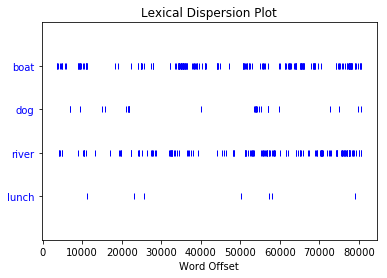

In [16]:
textList.dispersion_plot(["boat", "dog", "river", "lunch"])

#### By default tokenization includes all surrounting punctuation charachters

In [17]:
len(textList)

81185

#### We can invoke RegexpTokenizer to eliminate punctuation

In [18]:
#This will match any word characters until it reaches a non-word character, like a space
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(bk_3boat)

len(tokens)

68364

#### Measuring lexical diversity: dividing unique words by overall words

In [19]:
len(set(textList)) / len(textList)

0.09222146948327893

In [20]:
def lex_diversity_pct(text):
    return (len(set(textList)) / len(textList))*100

In [21]:
lex_diversity_pct(textList)

9.222146948327893

## Text normatliation with stemming and lemmatization

The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. For instance:

    am, are, is =>  be
    dog, dogs, dog's, dogs' => dog

The result of this mapping of text will be something like:

    the girl's dogs are different breeds => the girl dog be differ breed 

In [22]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

In [23]:
words[0:20]

['three',
 'men',
 'boat',
 'say',
 'nothing',
 'dog',
 'three',
 'men',
 'boat',
 'jerome',
 'jerome',
 'chapter',
 'three',
 'invalids',
 'sufferings',
 'george',
 'harris',
 'victim',
 'one',
 'hundred']

#### Converting lists to strings to simplify displaying / visualization

In [24]:
words_l = (words[0:50])
words_s = ', '.join(words_l)
type (words_s)

str

In [25]:
type (words_l)

list

In [26]:
', '.join(words[0:50])

'three, men, boat, say, nothing, dog, three, men, boat, jerome, jerome, chapter, three, invalids, sufferings, george, harris, victim, one, hundred, seven, fatal, maladies, useful, prescriptions, cure, liver, complaint, children, agree, overworked, need, rest, week, rolling, deep, george, suggests, river, montmorency, lodges, objection, original, motion, carried, majority, three, one, four, us'

#### Or using "print"

In [27]:
print (words_l)

['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalids', 'sufferings', 'george', 'harris', 'victim', 'one', 'hundred', 'seven', 'fatal', 'maladies', 'useful', 'prescriptions', 'cure', 'liver', 'complaint', 'children', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggests', 'river', 'montmorency', 'lodges', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'four', 'us']


#### Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 

In [28]:
print([porter.stem(t) for t in words[0:50]])

['three', 'men', 'boat', 'say', 'noth', 'dog', 'three', 'men', 'boat', 'jerom', 'jerom', 'chapter', 'three', 'invalid', 'suffer', 'georg', 'harri', 'victim', 'one', 'hundr', 'seven', 'fatal', 'maladi', 'use', 'prescript', 'cure', 'liver', 'complaint', 'children', 'agre', 'overwork', 'need', 'rest', 'week', 'roll', 'deep', 'georg', 'suggest', 'river', 'montmor', 'lodg', 'object', 'origin', 'motion', 'carri', 'major', 'three', 'one', 'four', 'us']


In [29]:
print([lancaster.stem(t) for t in words[0:50]])

['three', 'men', 'boat', 'say', 'noth', 'dog', 'three', 'men', 'boat', 'jerom', 'jerom', 'chapt', 'three', 'invalid', 'suff', 'georg', 'har', 'victim', 'on', 'hundr', 'sev', 'fat', 'malady', 'us', 'prescrib', 'cur', 'liv', 'complaint', 'childr', 'agr', 'overwork', 'nee', 'rest', 'week', 'rol', 'deep', 'georg', 'suggest', 'riv', 'montm', 'lodg', 'object', 'origin', 'mot', 'carry', 'maj', 'three', 'on', 'four', 'us']


#### Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. The dictionary checking makes lemmatizers significantly slower than stemmers

In [30]:
print (words_l)

['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalids', 'sufferings', 'george', 'harris', 'victim', 'one', 'hundred', 'seven', 'fatal', 'maladies', 'useful', 'prescriptions', 'cure', 'liver', 'complaint', 'children', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggests', 'river', 'montmorency', 'lodges', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'four', 'us']


In [31]:
wnl = nltk.WordNetLemmatizer()

In [32]:
print([wnl.lemmatize(t) for t in words[0:50]])

['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalid', 'suffering', 'george', 'harris', 'victim', 'one', 'hundred', 'seven', 'fatal', 'malady', 'useful', 'prescription', 'cure', 'liver', 'complaint', 'child', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggests', 'river', 'montmorency', 'lodge', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'four', 'u']


## Part of Speech Tagging

#### Can use help function to get explanations of endividual tags

In [33]:
uc1 = "The University of Chicago is a private research university in Chicago, Illinois"
uc2 = "It is one of the world's leading and most influential institutions of higher learning, with top-ten positions in numerous rankings and measures"

In [34]:
text = nltk.tokenize.word_tokenize(uc1)
nltk.pos_tag(text)

[('The', 'DT'),
 ('University', 'NNP'),
 ('of', 'IN'),
 ('Chicago', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('private', 'JJ'),
 ('research', 'NN'),
 ('university', 'NN'),
 ('in', 'IN'),
 ('Chicago', 'NNP'),
 (',', ','),
 ('Illinois', 'NNP')]

In [35]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [36]:
#list all possible tags and values
#nltk.help.upenn_tagset('.*')

## Reading from URL
#### BeautifulSoup to clean up meta-tags 

In [37]:
url = "https://en.wikipedia.org/wiki/University_of_Chicago"

In [38]:
from bs4 import BeautifulSoup
import urllib.request
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page.read(), "lxml")

In [39]:
uc_wiki = (soup.get_text())
#print (type(uc_wiki))
print (uc_wiki[6740:8000]) 

olors
Maroon and White
         


Athletics
NCAA Division III – UAA


Nickname
Maroons


Affiliations
AAU
NAICU
URA


Mascot
Phoenix


Website
www.uchicago.edu





The University of Chicago (U of C, Chicago, or UChicago) is a private research university in Chicago, Illinois. It holds top-ten positions in various national and international rankings.[6][7][8][9][10]
The university is composed of the College, various graduate programs and interdisciplinary committees organized into five academic research divisions and seven professional schools. Beyond the arts and sciences, Chicago is also well known for its professional schools, which include the Pritzker School of Medicine, the Booth School of Business, the Law School, the School of Social Service Administration, the Harris School of Public Policy Studies, the Divinity School and the Graham School of Continuing Liberal and Professional Studies. The university currently enrolls 5,971 undergraduate students, and 16,016 students overall

#### Even after BeautifulSoup we are left with a lot of garbade - mostly punctuation

In [40]:
uc_wiki_tokens = nltk.tokenize.word_tokenize(uc_wiki)
uc_wiki_tokens_uncleaned = uc_wiki_tokens
print (uc_wiki_tokens[2000:2100])

['Humanities', 'Medalists', ',', '[', '26', ']', '13', 'billionaire', 'graduates', 'and', 'a', 'plethora', 'of', 'members', 'of', 'the', 'United', 'States', 'Congress', 'and', 'heads', 'of', 'state', 'of', 'countries', 'all', 'over', 'the', 'world', '.', '[', '27', ']', 'Contents', '1', 'History', '1.1', '1856–1890', '1.2', '1890s–1910s', '1.3', '1920s–1980s', '1.4', '1990s–2010s', '2', 'Campus', '2.1', 'Satellite', 'campuses', '3', 'Administration', 'and', 'finances', '4', 'Academics', '4.1', 'Undergraduate', 'college', '4.2', 'Graduate', 'schools', 'and', 'committees', '4.3', 'Professional', 'schools', '4.4', 'Associated', 'academic', 'institutions', '4.4.1', 'Controversies', 'surrounding', 'Bettelheim', '4.4.2', 'Library', 'system', '4.5', 'Research', '4.6', 'Arts', '4.7', 'Reputation', 'and', 'rankings', '5', 'Student', 'body', 'and', 'admissions', '6', 'Athletics', '7', 'Student', 'life', '7.1', 'Student', 'organizations', '7.1.1', 'Student']


In [41]:
#stopwords = stopwords.words('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Remove single-character tokens (mostly punctuation)
uc_wiki_tokens = [word for word in uc_wiki_tokens if len(word) > 1]

# Remove punctuation
uc_wiki_tokens = [word for word in uc_wiki_tokens if word.isalpha()]

# Remove stopwords
uc_wiki_tokens_no_stopwords = [word for word in uc_wiki_tokens if word not in stopwords]

fdist = nltk.FreqDist(uc_wiki_tokens_no_stopwords)

fdist.most_common(10)

[('Chicago', 329),
 ('University', 310),
 ('The', 188),
 ('Retrieved', 134),
 ('university', 119),
 ('School', 75),
 ('College', 56),
 ('In', 55),
 ('students', 43),
 ('September', 39)]

### Comparing the results of our cleaned web scrape

#### Cleanest version with all noise and stopwords removed

In [42]:
uc_wiki_text_no_stopwords = nltk.Text(uc_wiki_tokens_no_stopwords)
print (uc_wiki_text_no_stopwords[:100])

['University', 'Chicago', 'Wikipedia', 'function', 'wgCanonicalNamespace', 'wgCanonicalSpecialPageName', 'false', 'wgNamespaceNumber', 'wgPageName', 'wgTitle', 'University', 'Chicago', 'wgCurRevisionId', 'wgRevisionId', 'wgArticleId', 'wgIsArticle', 'true', 'wgIsRedirect', 'false', 'wgAction', 'view', 'wgUserName', 'null', 'wgUserGroups', 'wgCategories', 'maint', 'BOT', 'status', 'unknown', 'errors', 'external', 'links', 'All', 'articles', 'dead', 'external', 'links', 'Articles', 'dead', 'external', 'links', 'December', 'Articles', 'permanently', 'dead', 'external', 'links', 'Use', 'mdy', 'dates', 'April', 'Good', 'articles', 'Articles', 'containing', 'text', 'Pages', 'using', 'deprecated', 'image', 'syntax', 'Articles', 'containing', 'potentially', 'dated', 'statements', 'May', 'All', 'articles', 'containing', 'potentially', 'dated', 'statements', 'Articles', 'containing', 'potentially', 'dated', 'statements', 'All', 'articles', 'unsourced', 'statements', 'Articles', 'unsourced', 'sta

#### Modest cleaning - only punctuation and noise - all stopwords left intact

In [43]:
uc_wiki_text_cleaned = nltk.Text(uc_wiki_tokens)
print (uc_wiki_text_cleaned[:100])

['University', 'of', 'Chicago', 'Wikipedia', 'function', 'wgCanonicalNamespace', 'wgCanonicalSpecialPageName', 'false', 'wgNamespaceNumber', 'wgPageName', 'wgTitle', 'University', 'of', 'Chicago', 'wgCurRevisionId', 'wgRevisionId', 'wgArticleId', 'wgIsArticle', 'true', 'wgIsRedirect', 'false', 'wgAction', 'view', 'wgUserName', 'null', 'wgUserGroups', 'wgCategories', 'maint', 'BOT', 'status', 'unknown', 'errors', 'external', 'links', 'All', 'articles', 'with', 'dead', 'external', 'links', 'Articles', 'with', 'dead', 'external', 'links', 'from', 'December', 'Articles', 'with', 'permanently', 'dead', 'external', 'links', 'Use', 'mdy', 'dates', 'from', 'April', 'Good', 'articles', 'Articles', 'containing', 'text', 'Pages', 'using', 'deprecated', 'image', 'syntax', 'Articles', 'containing', 'potentially', 'dated', 'statements', 'from', 'May', 'All', 'articles', 'containing', 'potentially', 'dated', 'statements', 'Articles', 'containing', 'potentially', 'dated', 'statements', 'from', 'All', 

#### No cleaning done

In [44]:
uc_wiki_text_raw = nltk.Text(uc_wiki_tokens_uncleaned)
print (uc_wiki_text_raw[:100])

['University', 'of', 'Chicago', '-', 'Wikipedia', 'document.documentElement.className', '=', 'document.documentElement.className.replace', '(', '/', '(', '^|\\s', ')', 'client-nojs', '(', '\\s|', '$', ')', '/', ',', '``', '$', '1client-js', '$', '2', "''", ')', ';', '(', 'window.RLQ=window.RLQ||', '[', ']', ')', '.push', '(', 'function', '(', ')', '{', 'mw.config.set', '(', '{', '``', 'wgCanonicalNamespace', "''", ':', "''", "''", ',', "''", 'wgCanonicalSpecialPageName', "''", ':', 'false', ',', "''", 'wgNamespaceNumber', "''", ':0', ',', "''", 'wgPageName', "''", ':', "''", 'University_of_Chicago', "''", ',', "''", 'wgTitle', "''", ':', "''", 'University', 'of', 'Chicago', "''", ',', "''", 'wgCurRevisionId', "''", ':818688066', ',', "''", 'wgRevisionId', "''", ':818688066', ',', "''", 'wgArticleId', "''", ':32127', ',', "''", 'wgIsArticle', "''", ':', 'true', ',', "''"]


### Applying simlarity function - which option produces best results?

#### Cleanest version with all noise and stopwords removed

In [45]:
uc_wiki_text_no_stopwords.similar('university')

memoir reputation spurs site notify buildings cornell minnesota purdue
in stetson isbn single maroon rutgers campus history retrieved iowa
pittsburgh


#### Modest cleaning - only punctuation andl noise - all stopwords left intact

In [46]:
uc_wiki_text_cleaned.similar('university')

college school president first history department office board world
association faculty chicago author campus buildings study law founder
developer site


#### No cleaning done

In [47]:
uc_wiki_text_raw.similar('university')

college school president department office board world association
faculty chicago author campus buildings first history study law
founder to developer


### Tagging our web page with POS

#### In order for the tagger to be effective, it has to tag each word based on the word itself, as well as its context within a sentence. 
Depending on your corpus, certain taggers perform better the others.  Like with SPSS TA dictionaries, you can start with pre-trained POS Tagger and then try multiple different options to see which one will perform best for you.
You can also customize and train your own taggers to match your particular corpus

In [48]:
uc_wiki_tagged = nltk.pos_tag(uc_wiki_text_cleaned)

In [49]:
type(uc_wiki_tagged)

list

In [50]:
uc_wiki_tagged[:10]

[('University', 'NNP'),
 ('of', 'IN'),
 ('Chicago', 'NNP'),
 ('Wikipedia', 'NNP'),
 ('function', 'NN'),
 ('wgCanonicalNamespace', 'NN'),
 ('wgCanonicalSpecialPageName', 'NN'),
 ('false', 'JJ'),
 ('wgNamespaceNumber', 'NN'),
 ('wgPageName', 'NN')]

## Exploring alternative text analysis packages: TextBlob

In [51]:
from textblob import TextBlob

In [52]:
blob = TextBlob(uc_wiki)

#### Part of speech tagging

In [53]:
blob.tags[:10]

[('University', 'NNP'),
 ('of', 'IN'),
 ('Chicago', 'NNP'),
 ('Wikipedia', 'NNP'),
 ('document.documentElement.className', 'NN'),
 ('=', 'NNP'),
 ('document.documentElement.className.replace', 'NN'),
 ('/', 'NNP'),
 ('^|\\s', 'NNP'),
 ('client-nojs', 'NN')]

#### To process  cleaned-up version from NLTK we will have to convert text from nltk.text.Text to String

In [54]:
type(uc_wiki_text_cleaned)

nltk.text.Text

In [55]:
words_list = (uc_wiki_text_cleaned[0:])
words_string = ', '.join(words_l)
print(type(words_list))
print(type(words_string))

<class 'list'>
<class 'str'>


In [56]:
blob = TextBlob(words_string)

In [57]:
blob.tags[:10]

[('three', 'CD'),
 ('men', 'NNS'),
 ('boat', 'NN'),
 ('say', 'VBP'),
 ('nothing', 'NN'),
 ('dog', 'NN'),
 ('three', 'CD'),
 ('men', 'NNS'),
 ('boat', 'NN'),
 ('jerome', 'NN')]

#### Nouns

In [58]:
blob.noun_phrases[:50]

WordList([])

#### Be careful with embedded functions to pluralize and singularize the words

In [59]:
s1 = TextBlob(words_s)

In [60]:
words_l[12:15]

['three', 'invalids', 'sufferings']

In [61]:
s1.words[12:15].singularize()

WordList(['three', 'invalid', 'suffering'])

In [62]:
words_l[1:3]

['men', 'boat']

In [63]:
s1.words[0:3].pluralize()

WordList(['threes', 'mens', 'boats'])

In [64]:
s1.words[0:20]

WordList(['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalids', 'sufferings', 'george', 'harris', 'victim', 'one', 'hundred'])

In [65]:
s1.words[0:20].lemmatize()

WordList(['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalid', 'suffering', 'george', 'harris', 'victim', 'one', 'hundred'])

#### Split to words

In [66]:
blob = TextBlob(uc_wiki)

In [67]:
b_words = blob.words
print (b_words[1020:1040])

['and', 'committees', '4.3', 'Professional', 'schools', '4.4', 'Associated', 'academic', 'institutions', '4.4.1', 'Controversies', 'surrounding', 'Bettelheim', '4.4.2', 'Library', 'system', '4.5', 'Research', '4.6', 'Arts']


#### Split to sentenses

In [68]:
b_sentences = blob.sentences
print (b_sentences[10:15])

[Sentence("The university is also home to the University of Chicago Press, the largest university press in the United States."), Sentence("[19] With an estimated completion date of 2020, the Barack Obama Presidential Center will be housed at the university and include both the Obama presidential library and offices of the Obama Foundation."), Sentence("[20]
The University of Chicago has many prominent alumni, faculty members and researchers."), Sentence("92 Nobel laureates[21] have been affiliated with the university as professors, students, faculty, or staff, making it the fifth most of any institution in the world."), Sentence("Similarly, 34 faculty members and 17 alumni have been awarded the MacArthur "Genius Grant".")]
